In [9]:
import os
from collections import deque

# Press a key to generate random values using Perlin noise
# or use the mouse to use the mouse_y value

WIDTH = 600
HEIGHT = 400
NUM_BARS = 20
NOISE_SCALE = 0.1

bar_size = WIDTH / NUM_BARS

def setup():
    size(WIDTH, HEIGHT)
    smooth()
    
    fill(255)
    
    global noise_x
    noise_x = 0.
    
    global noise_deque
#     noise_deque = deque()
#     for _ in range(NUM_BARS):
#         noise_deque.append(noise(noise_x))
#         noise_x += NOISE_SCALE
    
    # meh   
    noise_deque = deque((remap(noise(noise_x), 0, 1, 0, height) for _ in range(NUM_BARS) if (noise_x := noise_x + NOISE_SCALE)))
        
    no_loop()

def draw():   
    global noise_x
    
    background(127)
    
    for i, val in enumerate(noise_deque):
        with push_matrix():
            translate(i * bar_size, height)
            
            rect(0,0, bar_size, -val)
            
    if is_key_pressed:        
        noise_deque.append(remap(noise(noise_x), 0, 1, 0, height))
        noise_x += NOISE_SCALE
        noise_deque.popleft()
    elif is_mouse_pressed:
        noise_deque.append(height - mouse_y)
        noise_deque.popleft()              
    
def key_pressed():
    loop()
    
def key_release():
    no_loop()    

def mouse_pressed():
    loop()
    
def mouse_released():
    no_loop()    
    
run_sketch()
save_frame(os.getcwd() + "/bargraph_####.png", use_thread=True)

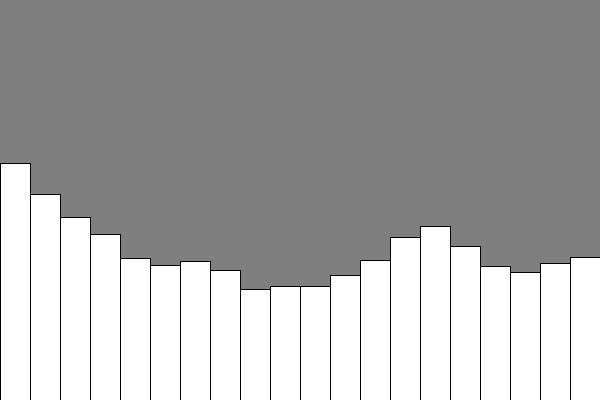